# Import The Library and Dataset

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Custom function
from func import check_data, CreateTimeSeries

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Set color for viz
color_pal = sns.color_palette()

# Import the data
dataset = pd.read_csv('Walmart_Sales.csv')
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Make a copy
df = dataset.copy()

# Set the index into Date
df.index = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Drop Date column for remove ambigous in data
df = df.drop(['Date'], axis=1)

In [4]:
check_data(df)

            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106  

Data shape: (6435, 7)

Data info:
 <bound method DataFrame.info of             Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                              

# Visualize

<Axes: title={'center': 'Weekly Sales'}, xlabel='Date'>

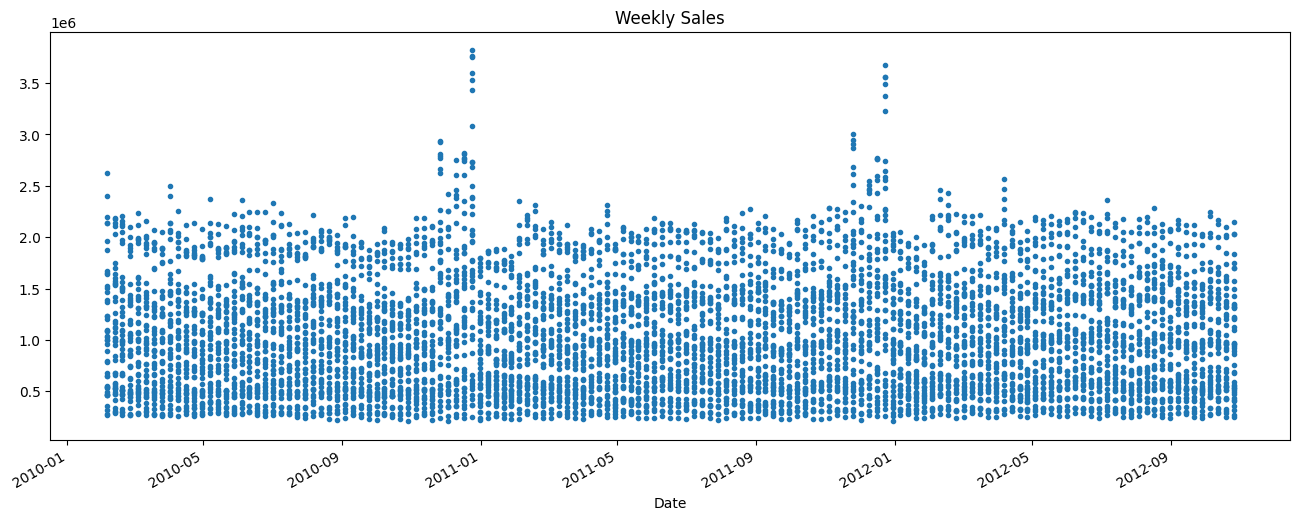

In [5]:
# Show the viz
df['Weekly_Sales'].plot(style='.', 
                        figsize=(16, 6), 
                        color=color_pal[0],
                        title='Weekly Sales')

In [6]:
# Add features engineering
df = CreateTimeSeries(df)

# Split the data
train = df.loc[df.index < '01-07-2012']
test = df.loc[df.index >= '01-07-2012']

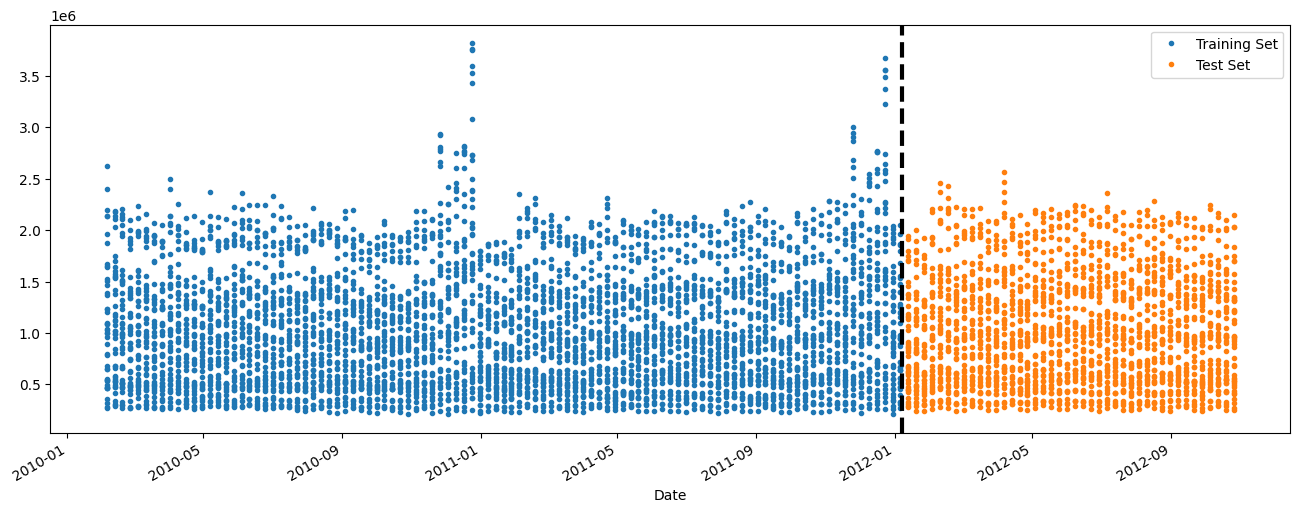

In [7]:
# Configure the plot
fig, ax = plt.subplots(figsize=(16, 6))

# Set the viz
train['Weekly_Sales'].plot(ax=ax, label='Training Set', style='.')
test['Weekly_Sales'].plot(ax=ax, label='Test Set', style='.')

# Set the line, legend and show the viz
ax.axvline('01-07-2012', color='black', ls='--', lw=3)
ax.legend(['Training Set', 'Test Set'])
plt.show()

<Axes: title={'center': 'Sales In A Week'}, xlabel='Date'>

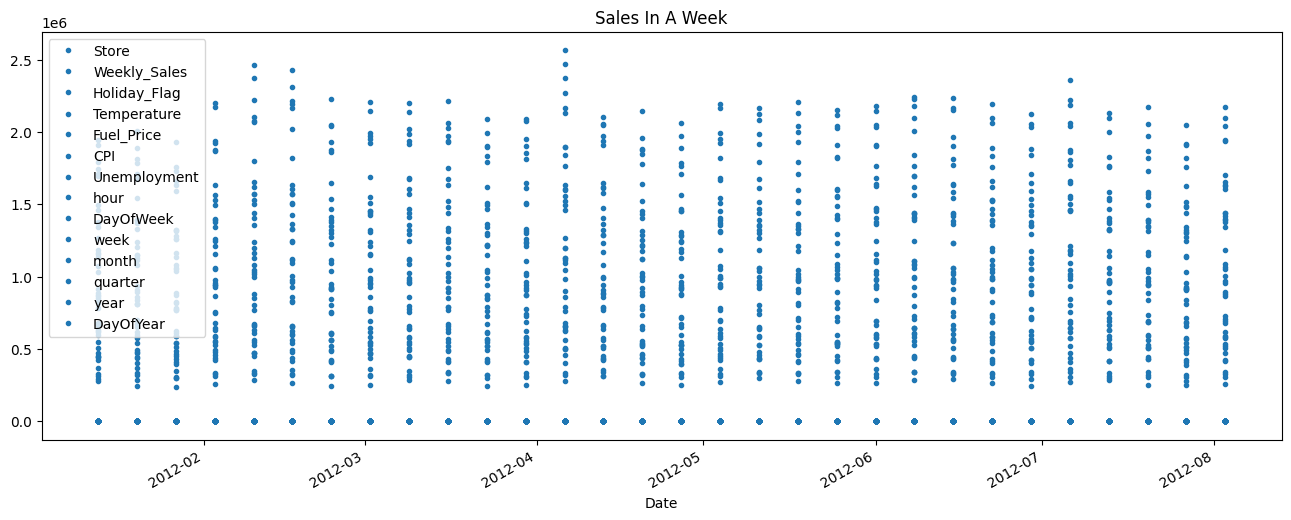

In [8]:
df.loc[(df.index > '01-09-2012') & (df.index < '08-09-2012')].plot(style = '.', 
                                                                   figsize=(16, 6), 
                                                                   color=color_pal[0],
                                                                   title='Sales In A Week')

## Outliears

<Axes: ylabel='Frequency'>

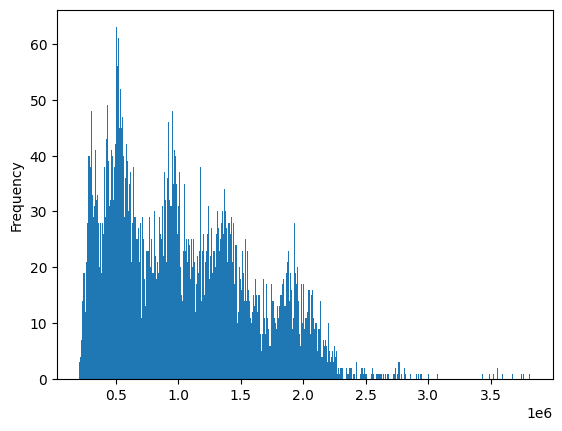

In [9]:
# Show data histogram
df['Weekly_Sales'].plot(kind='hist', bins=500)

<Axes: xlabel='Date'>

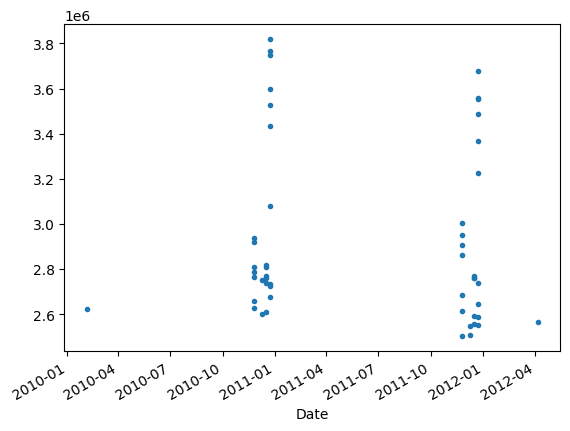

In [10]:
# Check outliear from highest value
df.query('Weekly_Sales > 2.5e6')['Weekly_Sales'].plot(style='.')

<Axes: xlabel='Date'>

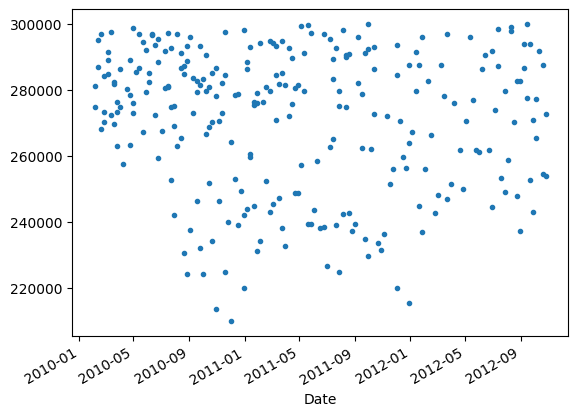

In [11]:
# Check the outliear from lowest value
df[df['Weekly_Sales'] < 0.3e6]['Weekly_Sales'].plot(style='.')

In [12]:
# Remove the outliears
df = df.query('Weekly_Sales < 2.5e6')
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,week,month,quarter,year,DayOfYear
Date,,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,0,4,5,2,1,2010,36
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,0,4,6,2,1,2010,43
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,0,4,7,2,1,2010,50
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,0,4,8,2,1,2010,57
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,4,9,3,1,2010,64


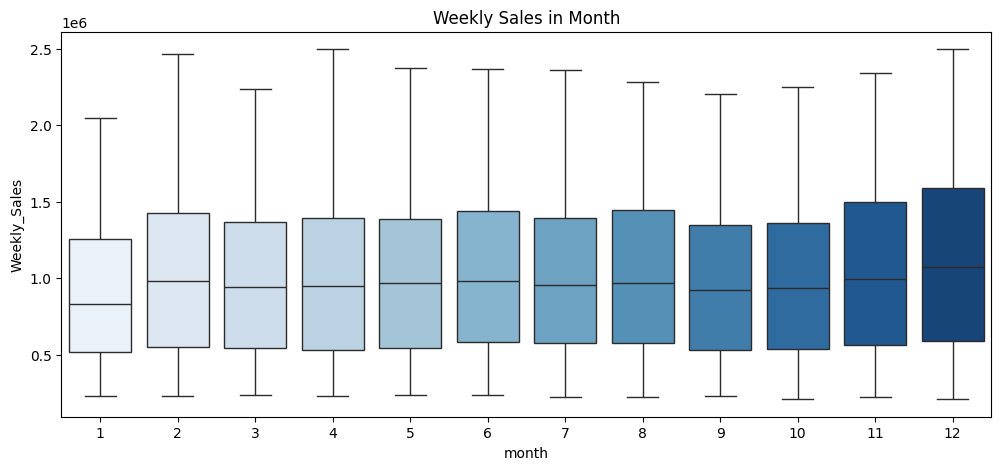

In [13]:
# Configure the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Set the boxplot
sns.boxplot(data=df,
            x='month',
            y='Weekly_Sales',
            palette='Blues')

# Set the title and show the viz
ax.set_title('Weekly Sales in Month')
plt.show()

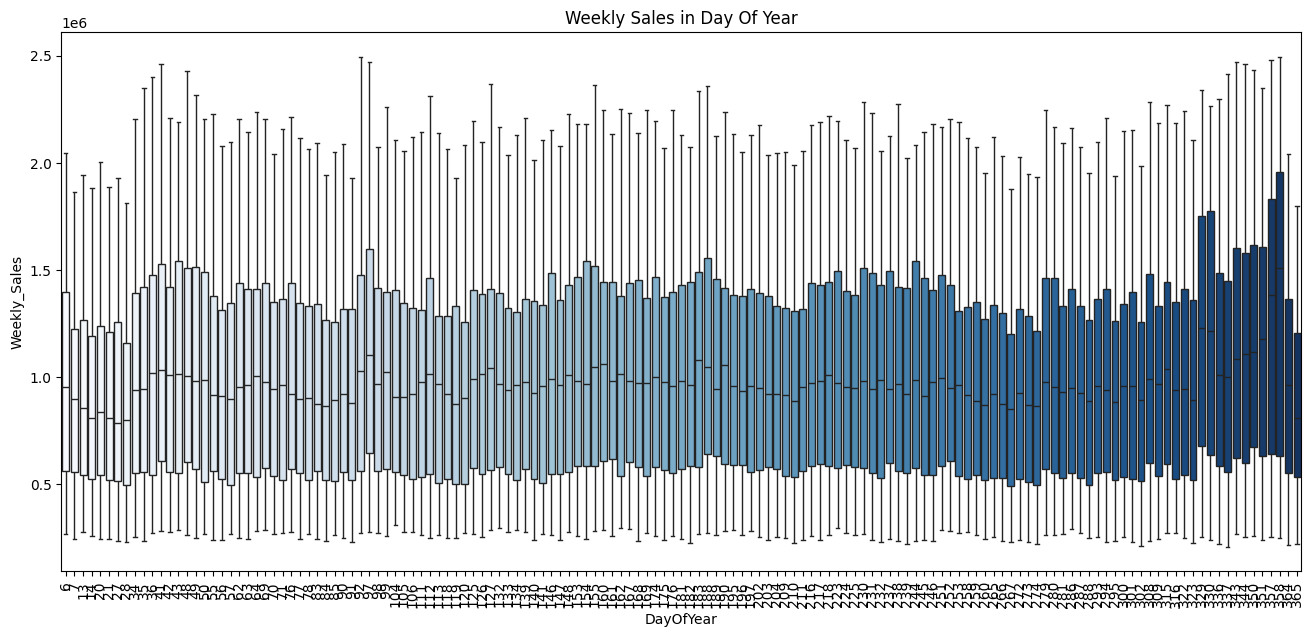

In [14]:
# Configure the plot
fig, ax = plt.subplots(figsize=(16, 7))

# Set the boxplot
sns.boxplot(data=df,
            x='DayOfYear',
            y='Weekly_Sales',
            palette='Blues')

# Set the title, rotate the label and show the viz
ax.set_title('Weekly Sales in Day Of Year')
ax.tick_params(axis='x', rotation=90)
plt.show()

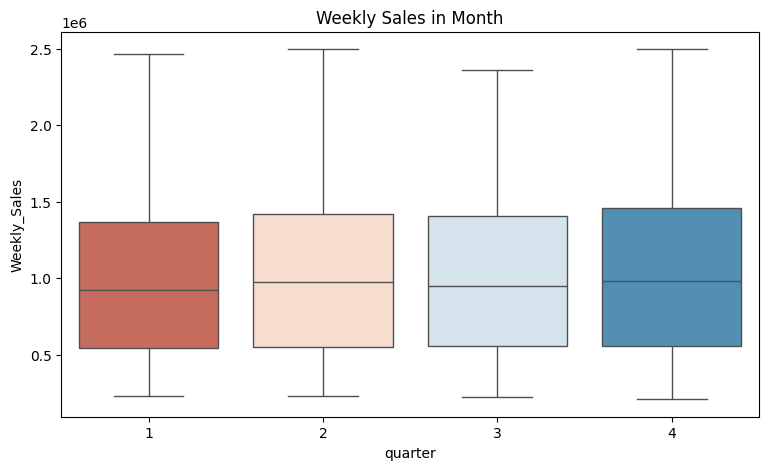

In [15]:
# Configure the plot
fig, ax = plt.subplots(figsize=(9, 5))

# Set the boxplot
sns.boxplot(data=df,
            x='quarter',
            y='Weekly_Sales',
            palette='RdBu')

# Set the title and show the viz
ax.set_title('Weekly Sales in Month')
plt.show()

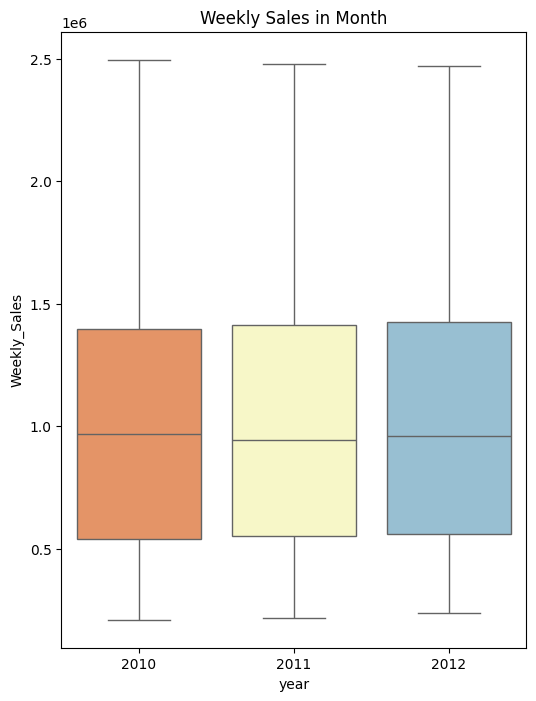

In [16]:
# Configure the plot
fig, ax = plt.subplots(figsize=(6, 8))

# Set the boxplot
sns.boxplot(data=df,
            x='year',
            y='Weekly_Sales',
            palette='RdYlBu')

# Set the title and show the viz
ax.set_title('Weekly Sales in Month')
plt.show()

# Machine Learning Forecasting

## Library

In [17]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, train_test_split

## Forecasting Horizon

### Time Series

In [18]:
# Declare the time series split
tss = TimeSeriesSplit(n_splits=5, 
                      test_size=6*90, 
                      gap=12)
df = df.sort_index()
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,week,month,quarter,year,DayOfYear
Date,,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,0,4,5,2,1,2010,36
2010-02-05,24,1388725.63,0,22.43,2.954,131.527903,8.326,0,4,5,2,1,2010,36
2010-02-05,19,1507637.17,0,20.96,2.954,131.527903,8.350,0,4,5,2,1,2010,36
2010-02-05,8,1004137.09,0,34.14,2.572,214.471451,6.299,0,4,5,2,1,2010,36
2010-02-05,42,543384.01,0,54.34,2.962,126.442065,9.765,0,4,5,2,1,2010,36


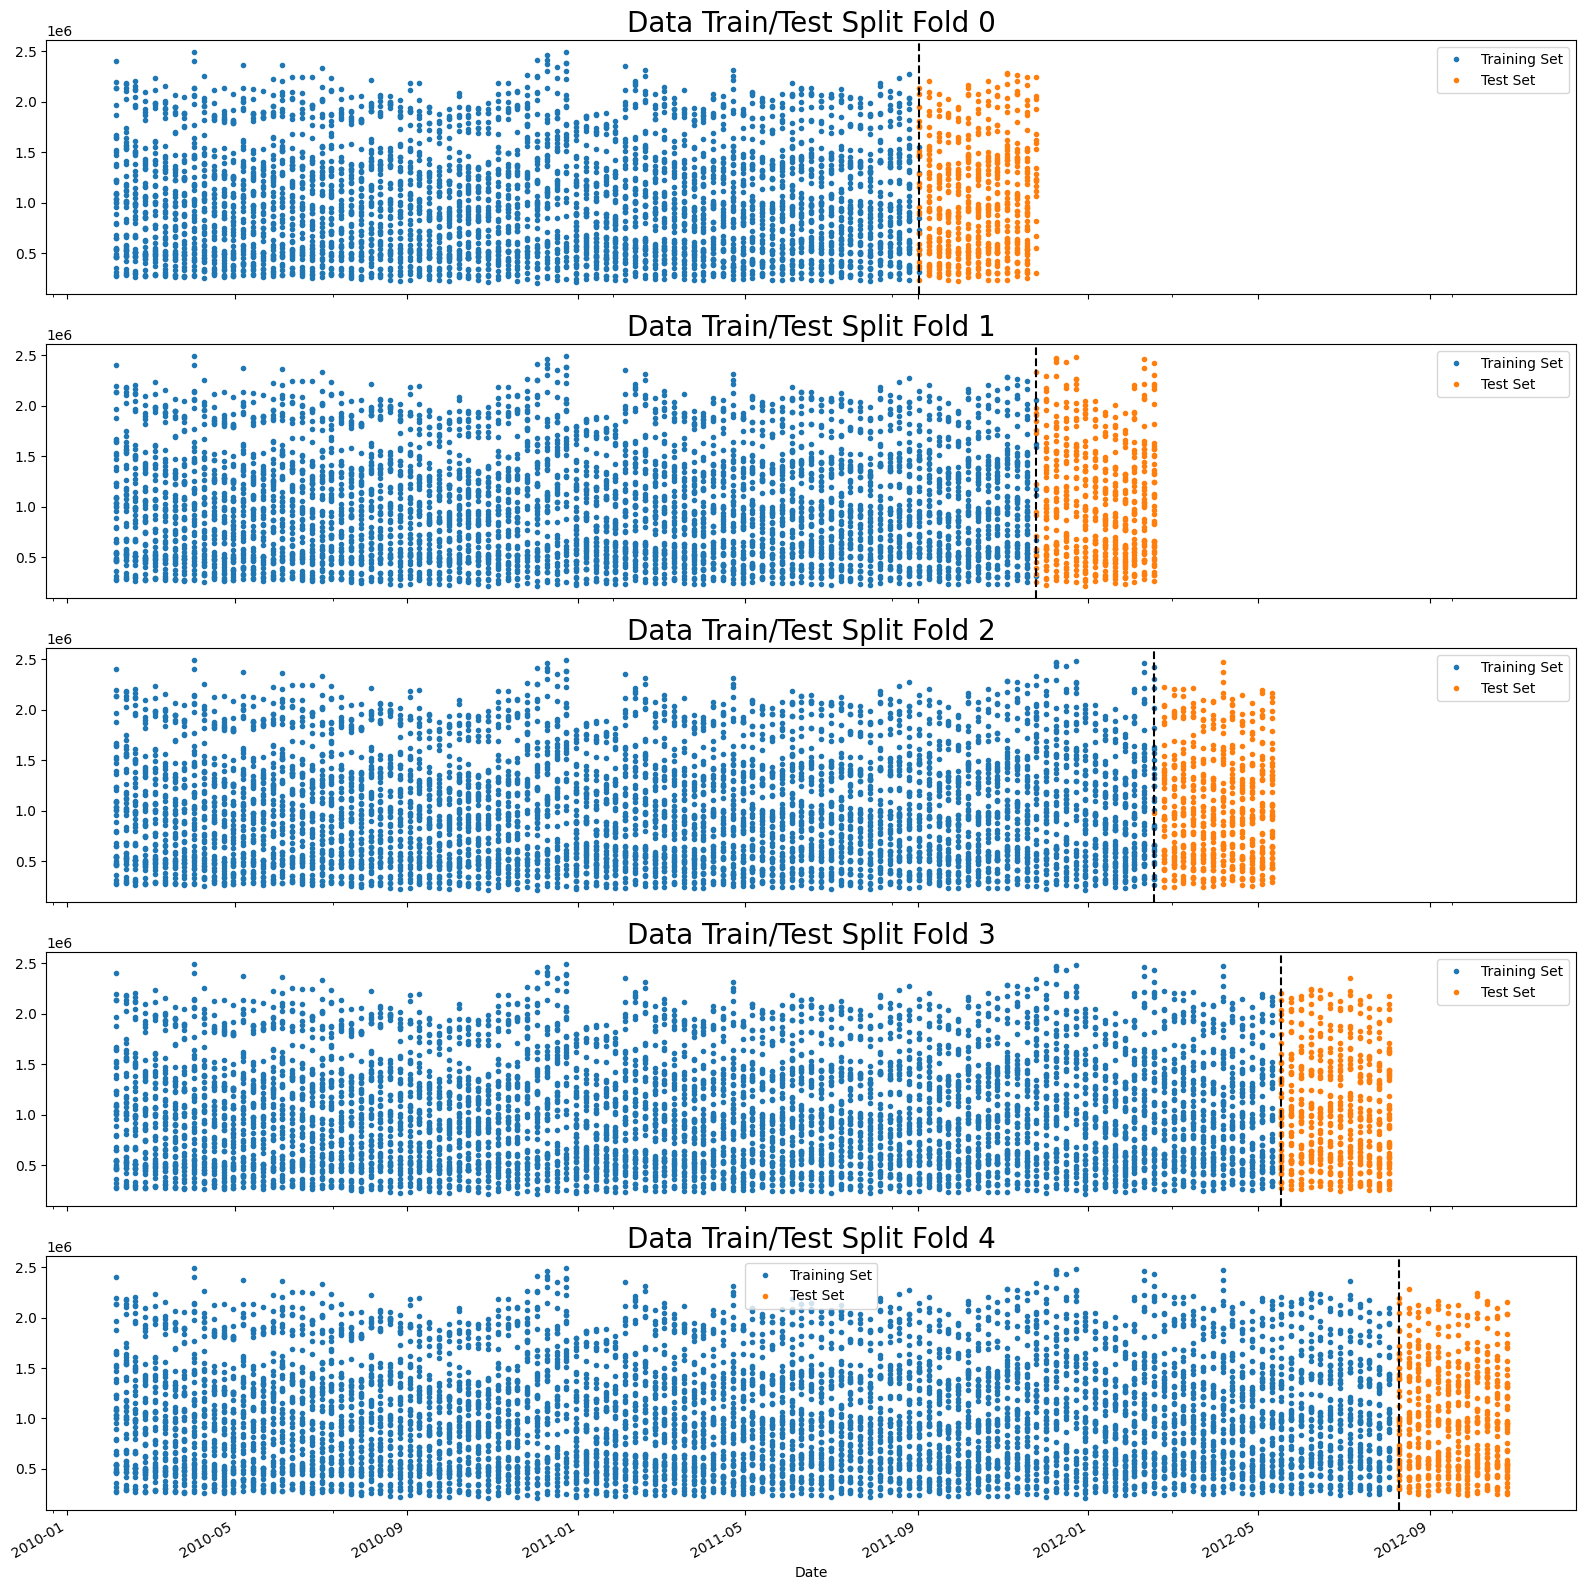

In [19]:
# Configure the plot
fig, axs = plt.subplots(5, 1, 
                        figsize=(16, 16),
                        sharex=True)
# Set fold in 0
fold = 0

for train_idx, test_idx in tss.split(df):

    # Take the data with index time series split
    trainTSS = df.iloc[train_idx]
    testTSS = df.iloc[test_idx]
    
    # Train Viz
    trainTSS['Weekly_Sales'].plot(ax=axs[fold],
                                  style='.',
                                  label='Training Set')

    # Test Viz
    testTSS['Weekly_Sales'].plot(ax=axs[fold],
                                 style='.',
                                 label='Test Set')
    
    # Set the line, title and legend
    axs[fold].axvline(testTSS.index.min(),  color='black', ls='--')
    axs[fold].set_title(f'Data Train/Test Split Fold {fold}', fontsize=20)
    axs[fold].legend()

    # Increase the fold
    fold += 1

# Show the viz
plt.tight_layout()
plt.show()

### Lag Features

In [33]:
# Save the target into new variable
target = df['Weekly_Sales'].to_dict()

# Make a copy from dataset
df_lag = df.copy()

# Make a copy for tuning models
df_tuning = df.copy()
from func import CreateTimeSeries, add_lags, MoreFeatures

df['Return'] = df['Weekly_Sales'].pct_change()*100
df_pre = df.copy()
df_pre['Return'] = df_pre['Return'].fillna(df['Return'].mean())
df_pre = CreateTimeSeries(df_pre)
df_pre = add_lags(df=df_pre,
                  lags=range(1, 4),
                  column='Weekly_Sales',
                  num=7)
df_pre = MoreFeatures(df=df_pre,
                      column='Weekly_Sales',
                      n_diff=7)

In [34]:
# Create the function 
def add_lags(df):
    df_lag = df.copy()
    df_lag['Lag1'] = (df_lag.index - pd.Timedelta('28 days')).map(target)
    df_lag['Lag2'] = (df_lag.index - pd.Timedelta('52 days')).map(target)
    df_lag['Lag3'] = (df_lag.index - pd.Timedelta('80 days')).map(target)
    return df_lag

In [35]:
df_pre.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'hour', 'DayOfWeek', 'week', 'month', 'quarter',
       'year', 'DayOfYear', 'Return', 'Lags1', 'Lags2', 'Lags3', 'Diff',
       'RollingMean', 'SinWeek', 'CosWeek'],
      dtype='object')

In [36]:
# Create variable for slicing
Features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'hour', 'DayOfWeek', 'week', 'month', 'quarter',
       'year', 'DayOfYear', 'Lag1', 'Lag2', 'Lag3']

FeaturesPre = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
               'CPI', 'Unemployment', 'hour', 'DayOfWeek', 'week', 'month', 'quarter',
               'year', 'DayOfYear', 'Lags1', 'Lags2', 'Lags3', 'Diff', 'RollingMean',
               'SinWeek', 'CosWeek']

targetsReturn = ['Return']
targetsLogReturn = ['LogReturn']
# Add features engineering
df_lag = add_lags(df_lag)

df_tuning = add_lags(df_tuning)

In [37]:
# Set fold in 0
fold = 0

# Create variable for save the result
best_models = {}
preds = []
scores = []

for train_idx, test_idx in tss.split(df):
    
    # Take the data from time series split with index slicing
    trainTSS = df_pre.iloc[train_idx]
    testTSS = df_pre.iloc[test_idx]

    # Set data for training
    X_train = trainTSS.loc[:, FeaturesPre]
    y_train = trainTSS.loc[:, targetsReturn]

    # Set data for test
    X_test = testTSS.loc[:, FeaturesPre]
    y_test = testTSS.loc[:, targetsReturn]

    # Set Hyperparameter
    reg = xgb.XGBRegressor(base_score=0.5,
                         booster='gbtree',
                         n_estimators=1000,
                         early_stopping_rounds=50,
                         objective='reg:linear',
                         max_depth=3,
                         learning_rate=0.01)
    # Fit the data
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    # Make a prediction
    y_pred = reg.predict(X_test)
    preds.append(y_pred)

    # Calculate the score
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

    # Save the models
    best_models[fold] = reg
    fold += 1


[0]	validation_0-rmse:130.84649	validation_1-rmse:133.78365
[100]	validation_0-rmse:105.80232	validation_1-rmse:110.51154
[200]	validation_0-rmse:98.14874	validation_1-rmse:104.60120
[300]	validation_0-rmse:94.34762	validation_1-rmse:102.30713
[400]	validation_0-rmse:92.10023	validation_1-rmse:101.06792
[500]	validation_0-rmse:90.52057	validation_1-rmse:100.49821
[600]	validation_0-rmse:89.23470	validation_1-rmse:99.99411
[700]	validation_0-rmse:88.16196	validation_1-rmse:99.59657
[800]	validation_0-rmse:87.16657	validation_1-rmse:99.39137
[900]	validation_0-rmse:86.24868	validation_1-rmse:99.26323
[960]	validation_0-rmse:85.74840	validation_1-rmse:99.25575
[0]	validation_0-rmse:131.26914	validation_1-rmse:135.04161
[100]	validation_0-rmse:106.47109	validation_1-rmse:112.95513
[200]	validation_0-rmse:98.93594	validation_1-rmse:106.83248
[300]	validation_0-rmse:95.20954	validation_1-rmse:103.85316
[400]	validation_0-rmse:93.06277	validation_1-rmse:102.25762
[500]	validation_0-rmse:91.59

In [38]:
# print Score
print(f'Score Mean  value:\n({np.mean(score):.2f})')
print(f'Score Score value:\n{"\n".join([f"{score:.2f}" for score in scores])}')

Score Mean  value:
(93.93)
Score Score value:
99.25
101.46
90.00
101.47
93.93


In [39]:
# from sklearn.model_selection import GridSearchCV
# import os
# import joblib  # Untuk menyimpan model

# # Set fold in 0
# fold = 0

# # Create variable for save the result
# best_models = {}
# preds = []
# scores = []

# # Buat folder jika belum ada
# os.makedirs('parameters', exist_ok=True)

# # Define parameter grid
# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1],
#     'n_estimators': [500, 1000],
#     'booster': ['gbtree', 'dart']
# }

# # Create base model
# xgb_model = xgb.XGBRegressor(base_score=0.5, 
#                              objective='reg:squarederror', 
#                              early_stopping_rounds=50)

# # Perform time series split
# for train_idx, test_idx in tss.split(df):
    
#     # Take the data from time series split with index slicing
#     trainTSS = df_tuning.iloc[train_idx]
#     testTSS = df_tuning.iloc[test_idx]

#     # Set data for training
#     X_train = trainTSS.loc[:, Features]
#     y_train = trainTSS.iloc[:, 1]

#     # Set data for test
#     X_test = testTSS.loc[:, Features]
#     y_test = testTSS.iloc[:, 1]

#     # Create GridSearchCV object
#     grid_search = GridSearchCV(estimator=xgb_model,
#                                param_grid=param_grid,
#                                scoring='neg_mean_squared_error',
#                                cv=5, 
#                                verbose=2,
#                                n_jobs=-1)
    
#     # Fit the data using grid search
#     grid_search.fit(X_train, y_train,
#                     eval_set=[(X_train, y_train), (X_test, y_test)],
#                     verbose=100)

#     # Get the best model
#     best_model = grid_search.best_estimator_

#     # Make a prediction
#     y_pred = best_model.predict(X_test)
#     preds.append(y_pred)

#     # Calculate the score
#     score = np.sqrt(mean_squared_error(y_test, y_pred))
#     scores.append(score)

#     # Save the models using joblib
#     model_filename = f'parameters/best_model_fold_{fold}.joblib'
#     joblib.dump(best_model, model_filename)
    
#     best_models[fold] = best_model
#     fold += 1

# print("Tuning complete. Best models and scores are saved.")


In [40]:
# print Score
print(f'Score Mean  value:\n({np.mean(score):.2f})')
print(f'Score Score value:\n{"\n".join([f"{score:.2f}" for score in scores])}')

Score Mean  value:
(93.93)
Score Score value:
99.25
101.46
90.00
101.47
93.93


In [41]:
# Set the data
X_all = df_pre.loc[:, FeaturesPre]
y_all = df_pre.loc[:, targetsReturn]

# Set Hyperparameter
reg_all = xgb.XGBRegressor(base_score=0.5,
                           booster='gbtree',
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)

# Fit the data
reg_all.fit(X_all, y_all,
            eval_set=[(X_all, y_all)],
            verbose=100)

[0]	validation_0-rmse:130.91574
[100]	validation_0-rmse:106.33140
[200]	validation_0-rmse:99.09350
[300]	validation_0-rmse:95.88623
[400]	validation_0-rmse:93.90484
[500]	validation_0-rmse:92.54519
[600]	validation_0-rmse:91.52349
[700]	validation_0-rmse:90.71438
[800]	validation_0-rmse:90.00383
[900]	validation_0-rmse:89.36929
[999]	validation_0-rmse:88.80459


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

<Axes: title={'center': 'Feature Importances'}>

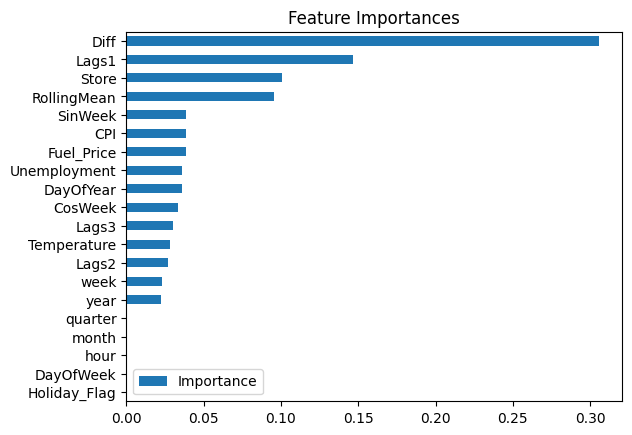

In [42]:
# Save the importance features into dataframe
fi = pd.DataFrame(data = reg_all.feature_importances_,
                  index = reg_all.feature_names_in_,
                  columns=['Importance'])

# Show the data with viz
fi.sort_values(by='Importance').plot(kind='barh', title='Feature Importances')

In [45]:
# Calculate the 20 percent of data for testing
percent20 = int(len(df_pre)*0.2)

# Take 20 percent of dataset
TestPred = df_pre.iloc[:percent20]
DataTest = TestPred.loc[:, FeaturesPre]

# Show the data
DataTest.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,week,month,quarter,year,DayOfYear,Lags1,Lags2,Lags3,Diff,RollingMean,SinWeek,CosWeek
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,42.31,2.572,211.096358,8.106,0,4,5,2,1,2010,36,NaN,NaN,NaN,NaN,NaN,0.568065,0.822984
2010-02-05,24,0,22.43,2.954,131.527903,8.326,0,4,5,2,1,2010,36,NaN,NaN,NaN,NaN,NaN,0.568065,0.822984
2010-02-05,19,0,20.96,2.954,131.527903,8.350,0,4,5,2,1,2010,36,NaN,NaN,NaN,NaN,NaN,0.568065,0.822984
2010-02-05,8,0,34.14,2.572,214.471451,6.299,0,4,5,2,1,2010,36,NaN,NaN,NaN,NaN,NaN,0.568065,0.822984
2010-02-05,42,0,54.34,2.962,126.442065,9.765,0,4,5,2,1,2010,36,NaN,NaN,NaN,NaN,NaN,0.568065,0.822984


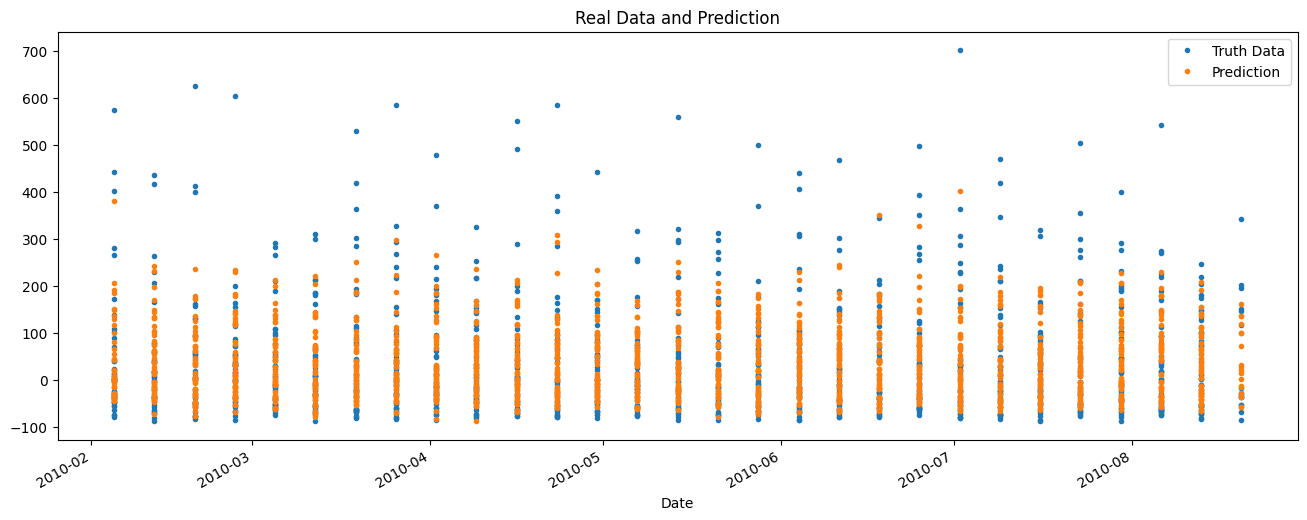

In [48]:
# Make a prediction and add into dataframe
pred = reg_all.predict(DataTest)
TestPred['preds'] = pred

# Set the plot
ax = TestPred['Return'].plot(figsize=(16,6), style='.')
TestPred['preds'].plot(ax=ax, style='.')

# Set the title, show the legend and viz
ax.set_title('Real Data and Prediction')
plt.legend(['Truth Data', 'Prediction'])
plt.show()

In [49]:
# Calculate the error
TestPred['Error'] = np.abs(TestPred['Return'] - TestPred['preds'])

# Top error value
top_error_value_lags = TestPred.groupby('Date')['Error'].mean().sort_values(ascending=False).head().iloc[0]

# Lowest error value
tail_error_value_lags = TestPred.groupby('Date')['Error'].mean().sort_values(ascending=True).head().iloc[0]

In [31]:
## Save Model
reg.save_model('models/ModelHorizon.json')

## XGBosst

### Split the data

In [32]:
# Training data
Features_without_lags = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
                         'CPI', 'Unemployment', 'hour', 'DayOfWeek', 'week', 'month', 'quarter',
                         'year', 'DayOfYear']

## Data without Lags
X = train.loc[:, Features_without_lags]
y = train.iloc[:, 1]
y = np.log(y)

# Test Data
X_test = test.loc[:, Features_without_lags]
y_test = test.iloc[:, 1]

### Train the data with XGBoost

In [33]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)

# Print the shape
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3636, 13), (3636,), (909, 13), (909,), (1890, 13), (1890,))

In [34]:
# Set the Hyperparameter
reg = xgb.XGBRegressor(n_estimator=1000,
                       early_stopping_rounds=50,
                       learning_rate=0.1)

# Fit the data into models
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=20)

[0]	validation_0-rmse:0.54423	validation_1-rmse:0.54150
[20]	validation_0-rmse:0.14160	validation_1-rmse:0.16272
[40]	validation_0-rmse:0.08311	validation_1-rmse:0.11335
[60]	validation_0-rmse:0.06445	validation_1-rmse:0.09822
[80]	validation_0-rmse:0.05544	validation_1-rmse:0.09128
[99]	validation_0-rmse:0.04889	validation_1-rmse:0.08573


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=1000, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Visualize the results

<Axes: title={'center': 'Feature Importances'}>

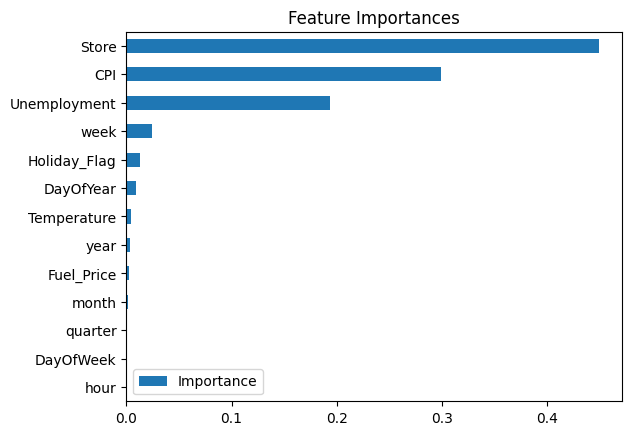

In [35]:
# Save the data into DataFrame
fi = pd.DataFrame(data = reg.feature_importances_,
                  index = reg.feature_names_in_,
                  columns=['Importance'])

# Show the data with viz
fi.sort_values(by='Importance').plot(kind='barh', title='Feature Importances')

In [36]:
# Make a prediction 
test['prediction'] = np.exp(reg.predict(X_test))

# Merge the prediction with dataset
df = df.merge(test['prediction'], how='left', left_index=True, right_index=True)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,week,month,quarter,year,DayOfYear,prediction
Date,,,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,0,4,5,2,1,2010,36,NaN
2010-02-05,24,1388725.63,0,22.43,2.954,131.527903,8.326,0,4,5,2,1,2010,36,NaN
2010-02-05,19,1507637.17,0,20.96,2.954,131.527903,8.350,0,4,5,2,1,2010,36,NaN
2010-02-05,8,1004137.09,0,34.14,2.572,214.471451,6.299,0,4,5,2,1,2010,36,NaN
2010-02-05,42,543384.01,0,54.34,2.962,126.442065,9.765,0,4,5,2,1,2010,36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,45,760281.43,0,58.85,3.882,192.308899,8.667,0,4,43,10,4,2012,300,1.230130e+06
2012-10-26,45,760281.43,0,58.85,3.882,192.308899,8.667,0,4,43,10,4,2012,300,5.813612e+05
2012-10-26,45,760281.43,0,58.85,3.882,192.308899,8.667,0,4,43,10,4,2012,300,7.776869e+05


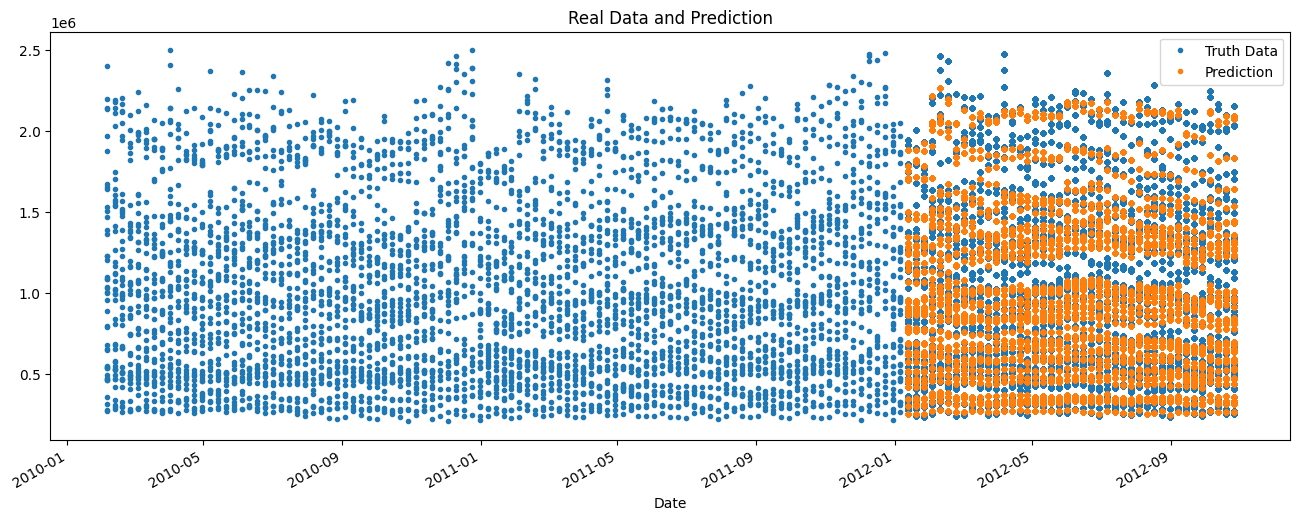

In [37]:
# Plot the viz
ax = df['Weekly_Sales'].plot(figsize=(16,6), style='.')
df['prediction'].plot(ax=ax, style='.')

# Set the title, show the legend and viz
ax.set_title('Real Data and Prediction')
plt.legend(['Truth Data', 'Prediction'])
plt.show()

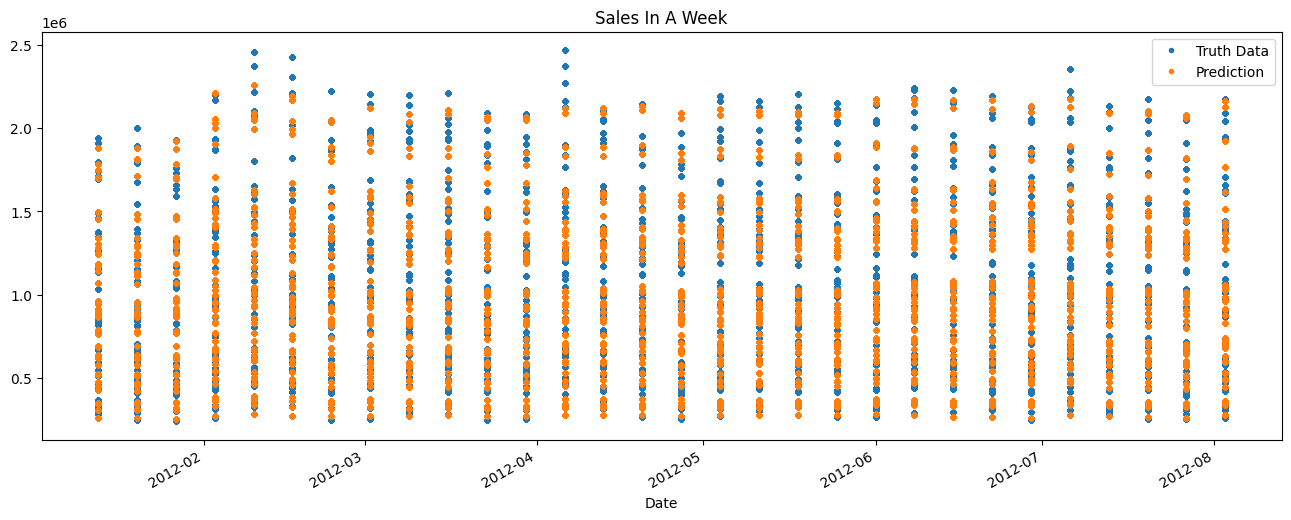

In [38]:
# Plot the viz with data range 01-09-2012 - 08-09-2012
ax = df.loc[(df.index > '01-09-2012') & (df.index < '08-09-2012')]['Weekly_Sales'].plot(style = '.', figsize=(16, 6),
                                                                                        title='Sales In A Week')
df.loc[(df.index > '01-09-2012') & (df.index < '08-09-2012')]['prediction'].plot(style = '.', )

# Show the legend and viz
plt.legend(['Truth Data', 'Prediction'])
plt.show() 

In [39]:
# Save the file
df.to_csv('data/Forecasting_Without_Lags.csv', index=False)

In [40]:
# Calculate the normal model score
score = np.sqrt(mean_squared_error(test['Weekly_Sales'], test['prediction']))

# Print the result with 4 decimal
print(f'Score Error RMSE: {score:.4f}')

Score Error RMSE: 245621.7256


In [41]:
# Calculate the log score
score_log = np.sqrt(mean_squared_error(np.log(test['Weekly_Sales']), np.log(test['prediction'])))

# Print the result with 4 decimal
print(f'Score Error RMSE in Log Value: {score_log:.4f}')

Score Error RMSE in Log Value: 0.2207


In [42]:
# Calculate the error
test['Error'] = np.abs(test['Weekly_Sales'] - test['prediction'])

In [43]:
test.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,week,month,quarter,year,DayOfYear,prediction,Error
Date,,,,,,,,,,,,,,,,
2012-01-13,1,1459601.17,0,48.53,3.261,219.892526,7.348,0,4,2,1,1,2012,13,1454445.000,5156.170
2012-01-20,1,1394393.84,0,54.11,3.268,219.985689,7.348,0,4,3,1,1,2012,20,1453390.000,58996.160
2012-01-27,1,1319325.59,0,54.26,3.290,220.078852,7.348,0,4,4,1,1,2012,27,1453044.875,133719.285
2012-02-03,1,1636339.65,0,56.55,3.360,220.172015,7.348,0,4,5,2,1,2012,34,1583193.750,53145.900
2012-02-10,1,1802477.43,1,48.02,3.409,220.265178,7.348,0,4,6,2,1,2012,41,1602207.250,200270.180


In [44]:
# Top error value
top_error_value = test.groupby('Date')['Error'].mean().sort_values(ascending=False).head().iloc[0]

# Lowest error value
tail_error_value = test.groupby('Date')['Error'].mean().sort_values(ascending=True).head().iloc[0]

In [45]:
# plus_minus = '\u00B1'
# Min error correction
min_value = (tail_error_value/test['Weekly_Sales'].mean())*100

# Max error correction
max_value = (top_error_value/test['Weekly_Sales'].mean())*100

# Print the result
print(f'Correction value between \nMin Error: {min_value:.2f}% \nMax Error: {max_value:.2f}%')

Correction value between 
Min Error: 7.37% 
Max Error: 21.49%


# Future Prediction

## Model With Lags

### Model TimeSeriesSplitCV 

In [54]:
# CV Model
reg_CV = best_models[2]

# Make a data test from range 2012-10-26 - 2013-6-26
future = pd.date_range('2012-10-26', '2013-4-26', freq='1d')

# Create the dataframe
future_df = pd.DataFrame(index=future)

# Make a copy
df_tss_CV = df_pre.copy()

# Mark the data test
future_df['IsFuture'] = True

# Add the column into dataset and mark False
df_tss_CV['IsFuture'] = False

# Concatenate
DfFuture_CV = pd.concat([df_tss_CV, future_df])

# Add the feature engineering timeseries and lags
DfFuture_CV = CreateTimeSeries(DfFuture_CV)
DfFuture_CV = add_lags(DfFuture_CV)

In [55]:
# Make a copy
FutureWithFeatures_CV = DfFuture_CV.query('IsFuture').copy()

# Make a prediction and add to column
FutureWithFeatures_CV['Preds'] = reg_CV.predict(FutureWithFeatures_CV.loc[:, FeaturesPre])

# Show the result
FutureWithFeatures_CV.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,week,...,Lags3,Diff,RollingMean,SinWeek,CosWeek,IsFuture,Lag1,Lag2,Lag3,Preds
2012-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,43,...,NaN,NaN,NaN,<NA>,<NA>,True,964726.37,NaN,NaN,-0.395558
2012-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5,43,...,NaN,NaN,NaN,<NA>,<NA>,True,NaN,NaN,NaN,-0.395558
2012-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6,43,...,NaN,NaN,NaN,<NA>,<NA>,True,NaN,NaN,NaN,-0.395558
2012-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,44,...,NaN,NaN,NaN,<NA>,<NA>,True,NaN,617405.35,1648570.03,-0.395558
2012-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,44,...,NaN,NaN,NaN,<NA>,<NA>,True,NaN,NaN,NaN,-0.395558


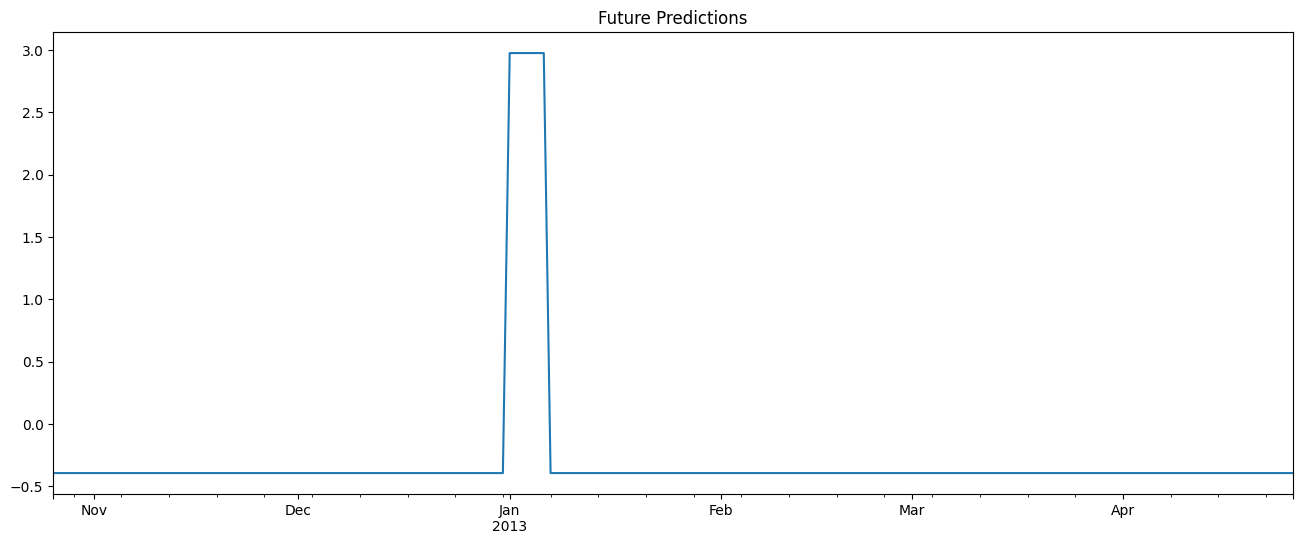

In [56]:
# Plotting
ax = FutureWithFeatures_CV['Preds'].plot(figsize=(16, 6),
                                          title='Future Predictions')

# save file
plt.savefig('images/future_predictions_CV.jpg', dpi=300, bbox_inches='tight')

# Menampilkan plot
plt.show()

### Model All Data

In [57]:
# Create the dataframe
future_df = pd.DataFrame(index=future)

# Mark the data test
future_df['IsFuture'] = True

# Make a copy
df_lag_all = df_pre.copy()
# Add the column into dataset and mark False
df_lag_all['IsFuture'] = False

# Concatenate
DfFuture_all = pd.concat([df_lag_all, future_df])

# Add the feature engineering timeseries and lags
DfFuture_all = CreateTimeSeries(DfFuture_all)
DfFuture_all = add_lags(DfFuture_all)

In [58]:
# Make a copy
FutureWithFeatures_all = DfFuture_all.query('IsFuture').copy()

# Make a prediction and add to column
FutureWithFeatures_all['Preds'] = reg_all.predict(FutureWithFeatures_all.loc[:, FeaturesPre])

# Show the result
FutureWithFeatures_all.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,week,...,Lags3,Diff,RollingMean,SinWeek,CosWeek,IsFuture,Lag1,Lag2,Lag3,Preds
2012-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,43,...,NaN,NaN,NaN,<NA>,<NA>,True,964726.37,NaN,NaN,-2.161137
2012-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5,43,...,NaN,NaN,NaN,<NA>,<NA>,True,NaN,NaN,NaN,-2.161137
2012-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6,43,...,NaN,NaN,NaN,<NA>,<NA>,True,NaN,NaN,NaN,-2.161137
2012-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,44,...,NaN,NaN,NaN,<NA>,<NA>,True,NaN,617405.35,1648570.03,-2.161137
2012-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,44,...,NaN,NaN,NaN,<NA>,<NA>,True,NaN,NaN,NaN,-2.161137


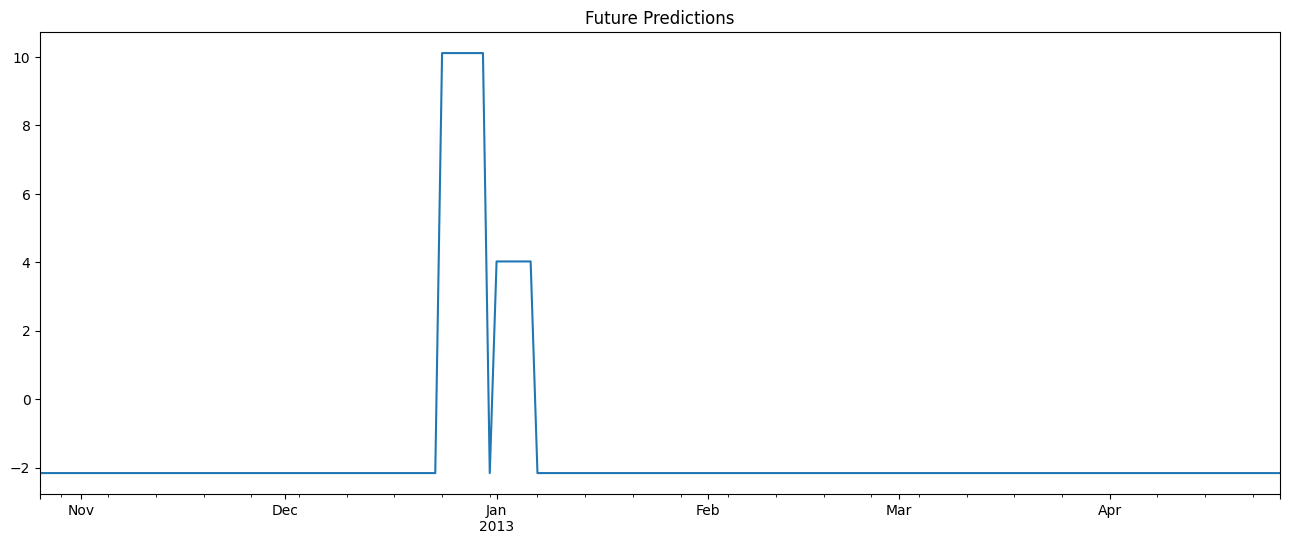

In [59]:
# Plotting
ax = FutureWithFeatures_all['Preds'].plot(figsize=(16, 6),
                                          title='Future Predictions')

# save file
plt.savefig('images/future_predictions_all.jpg', dpi=300, bbox_inches='tight')

# Menampilkan plot
plt.show()

## Model Without Lags

In [52]:
# Create the prediction data test from range time 2012-10-26  -  2013-6-26
future_without_lag = pd.date_range('2012-10-26', '2013-4-26', freq='1d')

# Create the DataFrame
future_df_without_lag = pd.DataFrame(index=future_without_lag)

# Mark the data test value for splitting
future_df_without_lag['IsFuture'] = True

# Mark the data not for test
df['IsFuture'] = False

# Concatenate the previous data and data test
DfFuture_without_lag = pd.concat([df, future_df_without_lag])

# Add feature engineering time series
DfFuture_without_lag = CreateTimeSeries(DfFuture_without_lag)

DfFuture_without_lag.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,week,month,quarter,year,DayOfYear,prediction,IsFuture
2013-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,17,4,2,2013,112,NaN,True
2013-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,17,4,2,2013,113,NaN,True
2013-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,17,4,2,2013,114,NaN,True
2013-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,17,4,2,2013,115,NaN,True
2013-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,17,4,2,2013,116,NaN,True


In [53]:
# Make a copy for only data test
Future_without_lag_pred = DfFuture_without_lag.query('IsFuture').copy()

# Add prediction column
Future_without_lag_pred['Preds'] = np.exp(reg.predict(Future_without_lag_pred.loc[:, Features_without_lags]))
Future_without_lag_pred.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,hour,DayOfWeek,week,month,quarter,year,DayOfYear,prediction,IsFuture,Preds
2013-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,17,4,2,2013,112,NaN,True,643264.6250
2013-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,17,4,2,2013,113,NaN,True,637060.6875
2013-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,17,4,2,2013,114,NaN,True,637060.6875
2013-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,17,4,2,2013,115,NaN,True,637060.6875
2013-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,17,4,2,2013,116,NaN,True,637060.6875


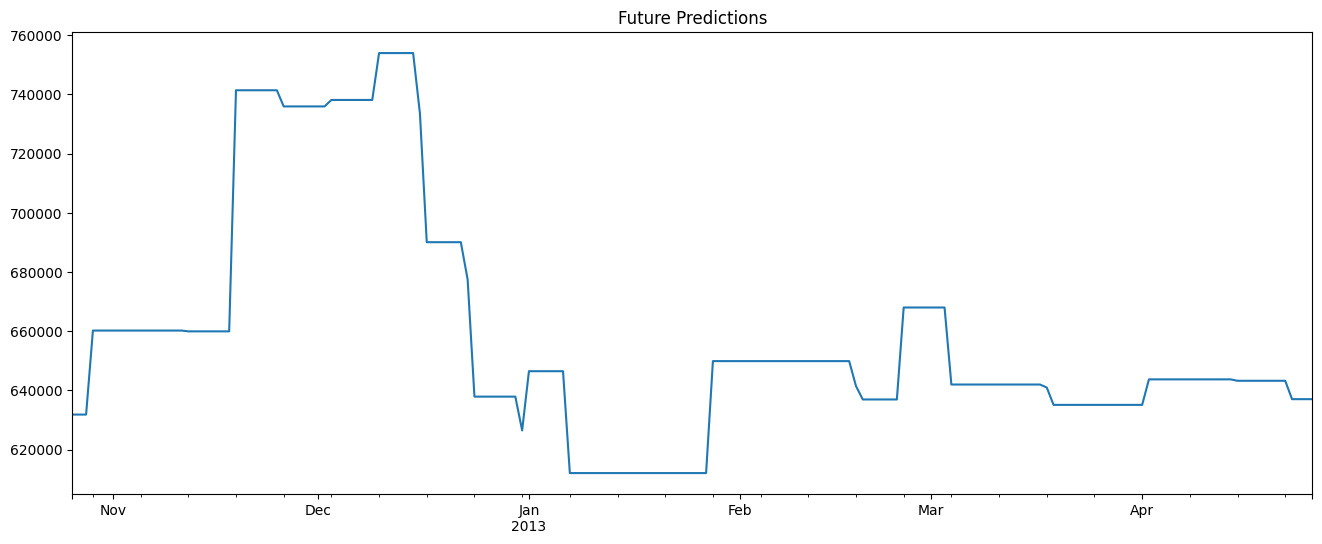

In [54]:
# Plotting
ax = Future_without_lag_pred['Preds'].plot(figsize=(16, 6),
                                      title='Future Predictions')

# Save file
plt.savefig('images/future_predictions_without_lag.jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [55]:
reg.save_model('models/ModelXgb.json')

## Tuning The Best Models

IndexError: positional indexers are out-of-bounds